This is to calculate $P_e$ and $J_0$ of multiple glaciers in Greenland using the flowline location provided by Felikson et al (2021).

This version tests different flowlines in the same basin.

The $P_e$ and $J_0$ are then compared with the glacier speed change during 1998-2018 from the ITS_LIVE data set.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pjgris import my_savgol_filter, savgol_smoothing, pe_corefun, cal_pej0_for_each_flowline, cal_avg_for_each_basin
import rasterio
import utils
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [18]:
netcdf_dir = '/home/jovyan/Projects/LubriSens/Data/Felikson2021/netcdfs'
glacier_file = netcdf_dir + '/glacier0168.nc'
speed_file = '/home/jovyan/Projects/LubriSens/Data/ITSLIVE/GRE_G0240_1998_v.tif'
vdiff_file = '/home/jovyan/Projects/LubriSens/Data/ITSLIVE/GRE_G0240_diff-2018-1998_v.tif'

In [19]:
ds = Dataset(glacier_file, 'r')
flowline_groups, _ = utils.get_flowline_groups(ds)
primary_flowlines = [i for i in flowline_groups if 'iter' not in i.path]

speed_data = rasterio.open(speed_file)
vdiff_data = rasterio.open(vdiff_file)

In [20]:
results = {}

for flowline_group in primary_flowlines:

    # print(flowline_group)
    data_group = cal_pej0_for_each_flowline(flowline_group, speed_data, vdiff_data)

    if data_group is not None:
        results[flowline_group.name] = data_group
        
results['avg'] = cal_avg_for_each_basin(results)
# results

(0.0, 60.099998474121094)

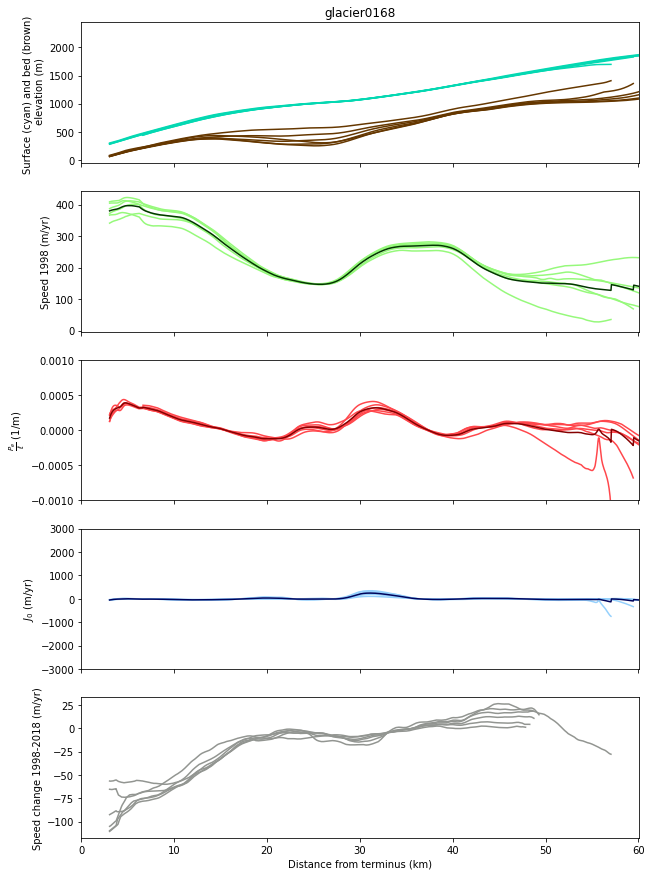

In [21]:
# results

fig, ax1 = plt.subplots(5, 1, sharex=True, figsize=(10, 15))
for key in results:
    if key != 'avg':
        ax1[0].plot(results[key]['d'], results[key]['s'], color='xkcd:aquamarine')
        ax1[0].plot(results[key]['d'], results[key]['b'], color='xkcd:brown')
        ax1[1].plot(results[key]['d'], results[key]['u'], color='xkcd:light green')
        ax1[2].plot(results[key]['d'], results[key]['pe'], color='xkcd:light red')
        ax1[3].plot(results[key]['d'], results[key]['j0'], color='xkcd:light blue')
        ax1[4].plot(results[key]['d'], results[key]['udiff_sm'], color='xkcd:gray')
    else:
        ax1[1].plot(results[key]['d'], results[key]['u'], color='xkcd:dark green')
        ax1[2].plot(results[key]['d'], results[key]['pe'], color='xkcd:dark red')
        ax1[3].plot(results[key]['d'], results[key]['j0'], color='xkcd:dark blue')

ax1[0].set_title(Path(glacier_file).stem)
ax1[0].set_ylabel('Surface (cyan) and bed (brown) \n elevation (m)')
ax1[1].set_ylabel('Speed 1998 (m/yr)')
ax1[2].set_ylabel(r'$\frac{P_e}{\ell}$ (1/m)')
ax1[2].set_ylim([-0.001, 0.001])
ax1[3].set_ylabel(r'$J_0$ (m/yr)')
ax1[3].set_ylim([-3000, 3000])
ax1[4].set_xlabel('Distance from terminus (km)')
ax1[4].set_ylabel('Speed change 1998-2018 (m/yr)')
ax1[4].set_xlim([0, results['avg']['d'][-1]])

(0.0, 60.099998474121094)

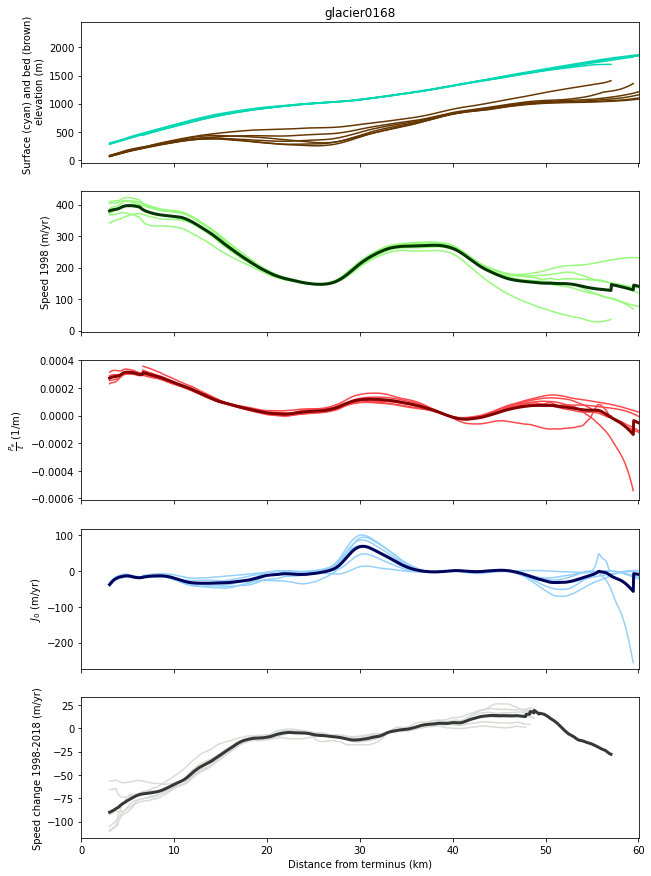

In [22]:
# results

fig, ax1 = plt.subplots(5, 1, sharex=True, figsize=(10, 15))
for key in results:
    if key != 'avg':
        ax1[0].plot(results[key]['d'], results[key]['s'], color='xkcd:aquamarine')
        ax1[0].plot(results[key]['d'], results[key]['b'], color='xkcd:brown')
        ax1[1].plot(results[key]['d'], results[key]['u'], color='xkcd:light green')
        ax1[2].plot(results[key]['d'], results[key]['pe_ignore_dslope'], color='xkcd:light red')
        ax1[3].plot(results[key]['d'], results[key]['j0_ignore_dslope'], color='xkcd:light blue')
        ax1[4].plot(results[key]['d'], results[key]['udiff_sm'], color='xkcd:light grey')
    else:
        ax1[1].plot(results[key]['d'], results[key]['u'], color='xkcd:dark green', linewidth=3)
        ax1[2].plot(results[key]['d'], results[key]['pe_ignore_dslope'], color='xkcd:dark red', linewidth=3)
        ax1[3].plot(results[key]['d'], results[key]['j0_ignore_dslope'], color='xkcd:dark blue', linewidth=3)
        ax1[4].plot(results[key]['d'], results[key]['udiff_sm'], color='xkcd:dark grey', linewidth=3)

ax1[0].set_title(Path(glacier_file).stem)
ax1[0].set_ylabel('Surface (cyan) and bed (brown) \n elevation (m)')
ax1[1].set_ylabel('Speed 1998 (m/yr)')
ax1[2].set_ylabel(r'$\frac{P_e}{\ell}$ (1/m)')
# ax1[2].set_ylim([-0.001, 0.001])
ax1[3].set_ylabel(r'$J_0$ (m/yr)')
# ax1[3].set_ylim([-3000, 3000])
ax1[4].set_xlabel('Distance from terminus (km)')
ax1[4].set_ylabel('Speed change 1998-2018 (m/yr)')
ax1[4].set_xlim([0, results['avg']['d'][-1]])

Text(0.5, 1.0, 'glacier0168( Dot spacing: 50 m)')

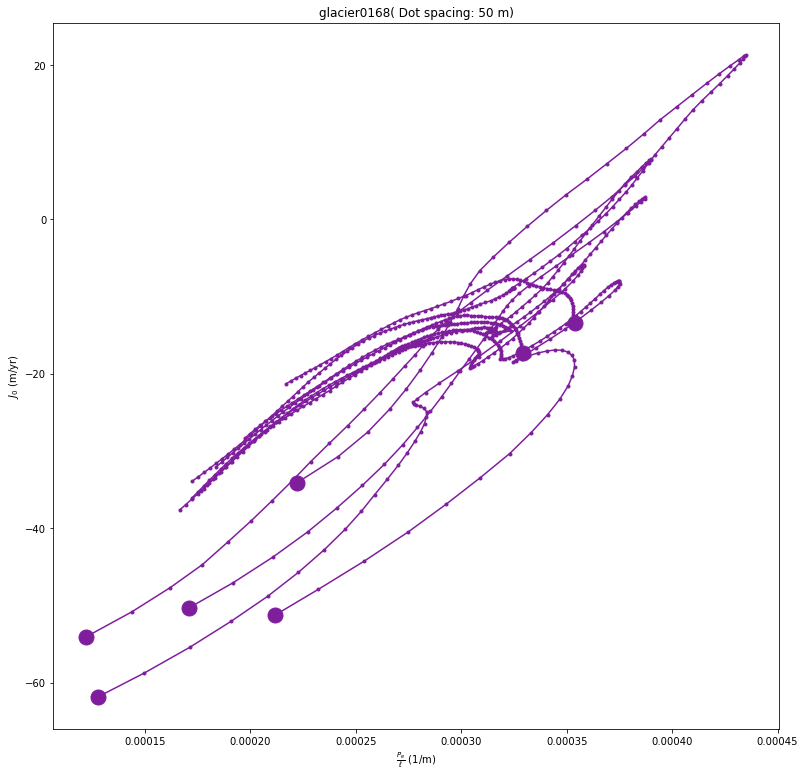

In [8]:
fig, ax2 = plt.subplots(1, 1, figsize=(13, 13))
for key in results:
    length = 200
    ax2.plot(results[key]['pe'][:length], results[key]['j0'][:length], '.-', color='xkcd:purple')
    # plot first non-NaN value (the one closest to the terminus)
    ax2.plot(next(x for x in results[key]['pe'][:length] if not np.isnan(x)),
             next(x for x in results[key]['j0'][:length] if not np.isnan(x)), '.', color='xkcd:purple', markersize=30)
    
ax2.set_xlabel(r'$\frac{P_e}{\ell}$ (1/m)')
ax2.set_ylabel(r'$J_0$ (m/yr)')
ax2.set_title(Path(glacier_file).stem + '( Dot spacing: 50 m)')

Text(0.5, 1.0, 'glacier0168( Dot spacing: 50 m)')

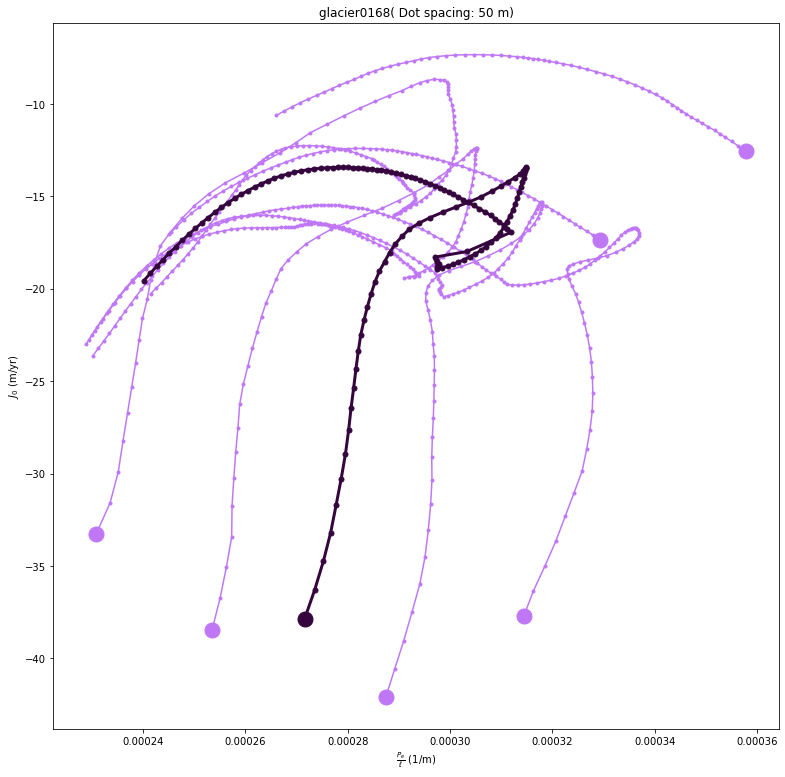

In [9]:
fig, ax2 = plt.subplots(1, 1, figsize=(13, 13))
for key in results:
    length = 200
    if key != 'avg':
        ax2.plot(results[key]['pe_ignore_dslope'][:length], results[key]['j0_ignore_dslope'][:length], '.-', color='xkcd:light purple')
        # plot first non-NaN value (the one closest to the terminus)
        ax2.plot(next(x for x in results[key]['pe_ignore_dslope'][:length] if not np.isnan(x)),
                 next(x for x in results[key]['j0_ignore_dslope'][:length] if not np.isnan(x)), '.', color='xkcd:light purple', markersize=30)
    else:
        ax2.plot(results[key]['pe_ignore_dslope'][:length], results[key]['j0_ignore_dslope'][:length], '.-', color='xkcd:dark purple', linewidth=3, markersize=10)
        # plot first non-NaN value (the one closest to the terminus)
        ax2.plot(next(x for x in results[key]['pe_ignore_dslope'][:length] if not np.isnan(x)),
                 next(x for x in results[key]['j0_ignore_dslope'][:length] if not np.isnan(x)), '.', color='xkcd:dark purple', markersize=30)
    
ax2.set_xlabel(r'$\frac{P_e}{\ell}$ (1/m)')
ax2.set_ylabel(r'$J_0$ (m/yr)')
ax2.set_title(Path(glacier_file).stem + '( Dot spacing: 50 m)')

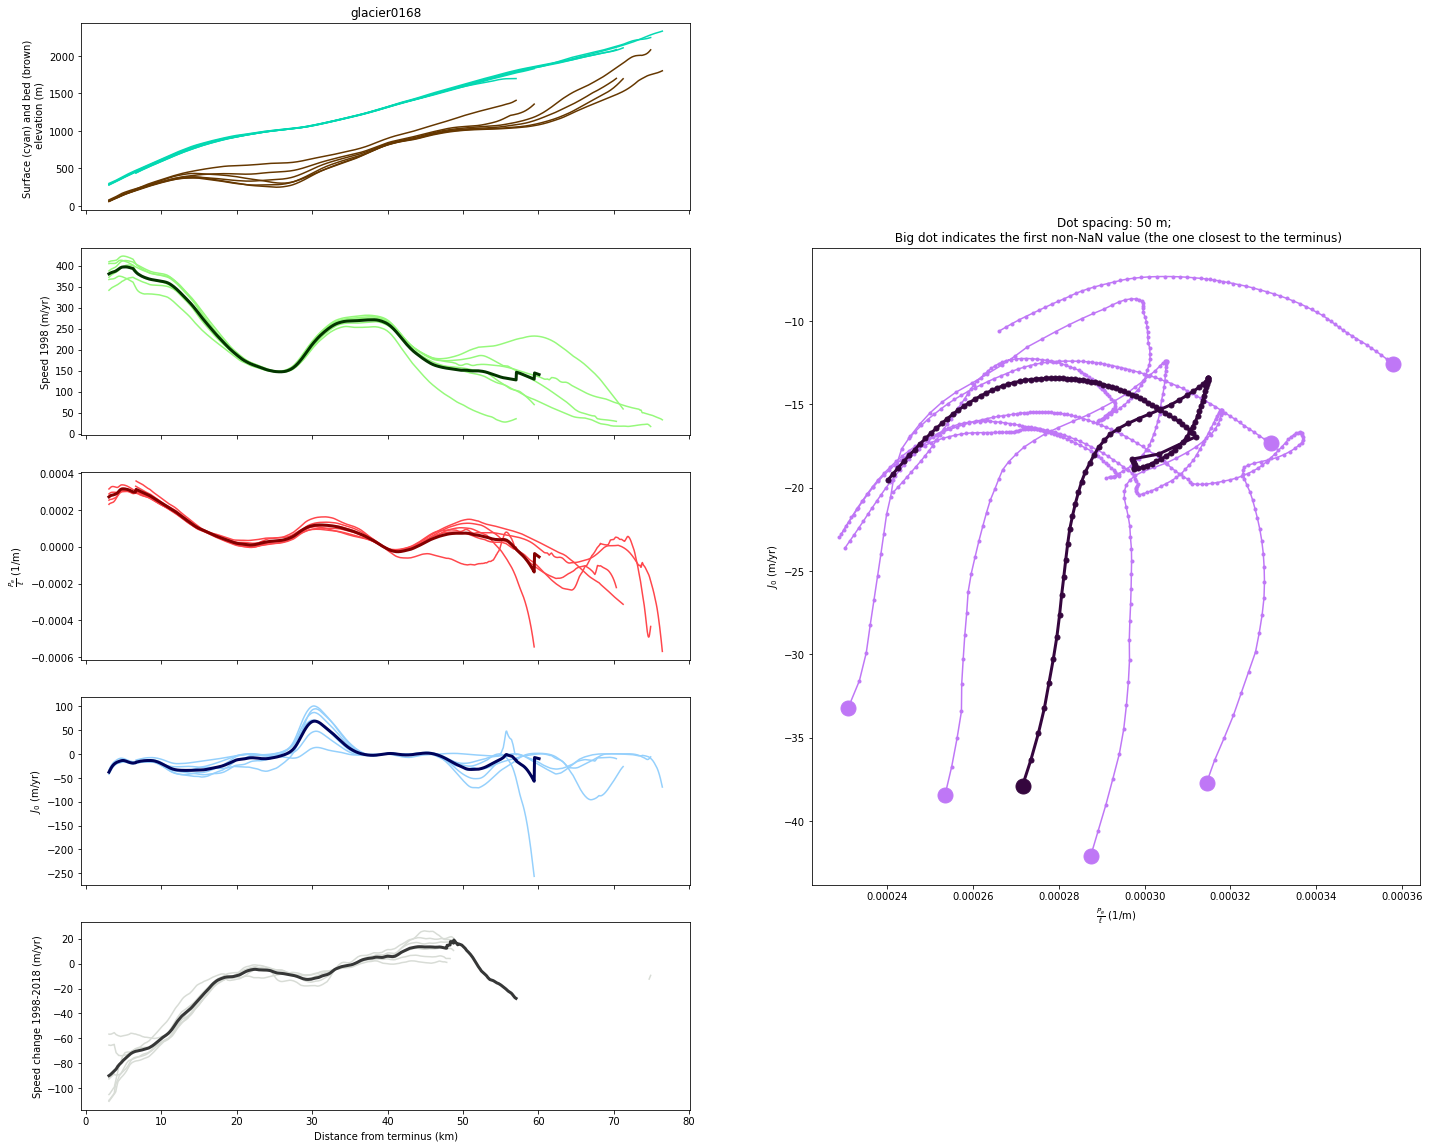

In [12]:
fig, ax3 = plt.subplots(5, 2, sharex=True, figsize=(24, 20))
gs = ax3[1, 1].get_gridspec()
for ax in ax3[:, 1]:
    ax.remove()
axbig = fig.add_subplot(gs[1:4, 1])
pej0_plot_length = 200

for key in results:

    if key != 'avg':
        ax3[0, 0].plot(results[key]['d'], results[key]['s'], color='xkcd:aquamarine')
        ax3[0, 0].plot(results[key]['d'], results[key]['b'], color='xkcd:brown')
        ax3[1, 0].plot(results[key]['d'], results[key]['u'], color='xkcd:light green')
        ax3[2, 0].plot(results[key]['d'], results[key]['pe_ignore_dslope'], color='xkcd:light red')
        ax3[3, 0].plot(results[key]['d'], results[key]['j0_ignore_dslope'], color='xkcd:light blue')
        # ax3[2, 0].plot(results[key]['d'], results[key]['pe'], color='xkcd:light red')
        # ax3[3, 0].plot(results[key]['d'], results[key]['j0'], color='xkcd:light blue')
        ax3[4, 0].plot(results[key]['d'], results[key]['udiff_sm'], color='xkcd:light grey')
        axbig.plot(results[key]['pe_ignore_dslope'][:pej0_plot_length], results[key]['j0_ignore_dslope'][:pej0_plot_length], '.-', color='xkcd:light purple')
        # axbig.plot(results[key]['pe'][:pej0_plot_length], results[key]['j0'][:pej0_plot_length], '.-', color='xkcd:light purple')
        # plot first non-NaN value (the one closest to the terminus)
        axbig.plot(next(x for x in results[key]['pe_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)),
                   next(x for x in results[key]['j0_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)), '.', color='xkcd:light purple', markersize=30)
        # axbig.plot(next(x for x in results[key]['pe'][:pej0_plot_length] if not np.isnan(x)),
        #            next(x for x in results[key]['j0'][:pej0_plot_length] if not np.isnan(x)), '.', color='xkcd:light purple', markersize=30)
    else:
        ax3[1, 0].plot(results[key]['d'], results[key]['u'], color='xkcd:dark green', linewidth=3)
        ax3[2, 0].plot(results[key]['d'], results[key]['pe_ignore_dslope'], color='xkcd:dark red', linewidth=3)
        ax3[3, 0].plot(results[key]['d'], results[key]['j0_ignore_dslope'], color='xkcd:dark blue', linewidth=3)
        # ax3[2, 0].plot(results[key]['d'], results[key]['pe'], color='xkcd:dark red', linewidth=3)
        # ax3[3, 0].plot(results[key]['d'], results[key]['j0'], color='xkcd:dark blue', linewidth=3)
        ax3[4, 0].plot(results[key]['d'], results[key]['udiff_sm'], color='xkcd:dark grey', linewidth=3)
        axbig.plot(results[key]['pe_ignore_dslope'][:pej0_plot_length], results[key]['j0_ignore_dslope'][:pej0_plot_length], '.-', color='xkcd:dark purple', linewidth=3, markersize=10)
        # axbig.plot(results[key]['pe'][:pej0_plot_length], results[key]['j0'][:pej0_plot_length], '.-', color='xkcd:dark purple', linewidth=3, markersize=10)
        # plot first non-NaN value (the one closest to the terminus)
        axbig.plot(next(x for x in results[key]['pe_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)),
                 next(x for x in results[key]['j0_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)), '.', color='xkcd:dark purple', markersize=30)
        # axbig.plot(next(x for x in results[key]['pe'][:pej0_plot_length] if not np.isnan(x)),
        #          next(x for x in results[key]['j0'][:pej0_plot_length] if not np.isnan(x)), '.', color='xkcd:dark purple', markersize=30)
        
    
ax3[0, 0].set_title(Path(glacier_file).stem)
ax3[0, 0].set_ylabel('Surface (cyan) and bed (brown) \n elevation (m)')
ax3[1, 0].set_ylabel('Speed 1998 (m/yr)')
ax3[2, 0].set_ylabel(r'$\frac{P_e}{\ell}$ (1/m)')
ax3[3, 0].set_ylabel(r'$J_0$ (m/yr)')
ax3[4, 0].set_xlabel('Distance from terminus (km)')
ax3[4, 0].set_ylabel('Speed change 1998-2018 (m/yr)')
axbig.set_xlabel(r'$\frac{P_e}{\ell}$ (1/m)')
axbig.set_ylabel(r'$J_0$ (m/yr)')
axbig.set_title('Dot spacing: 50 m; \n Big dot indicates the first non-NaN value (the one closest to the terminus)')

plt.savefig('tmp.png')